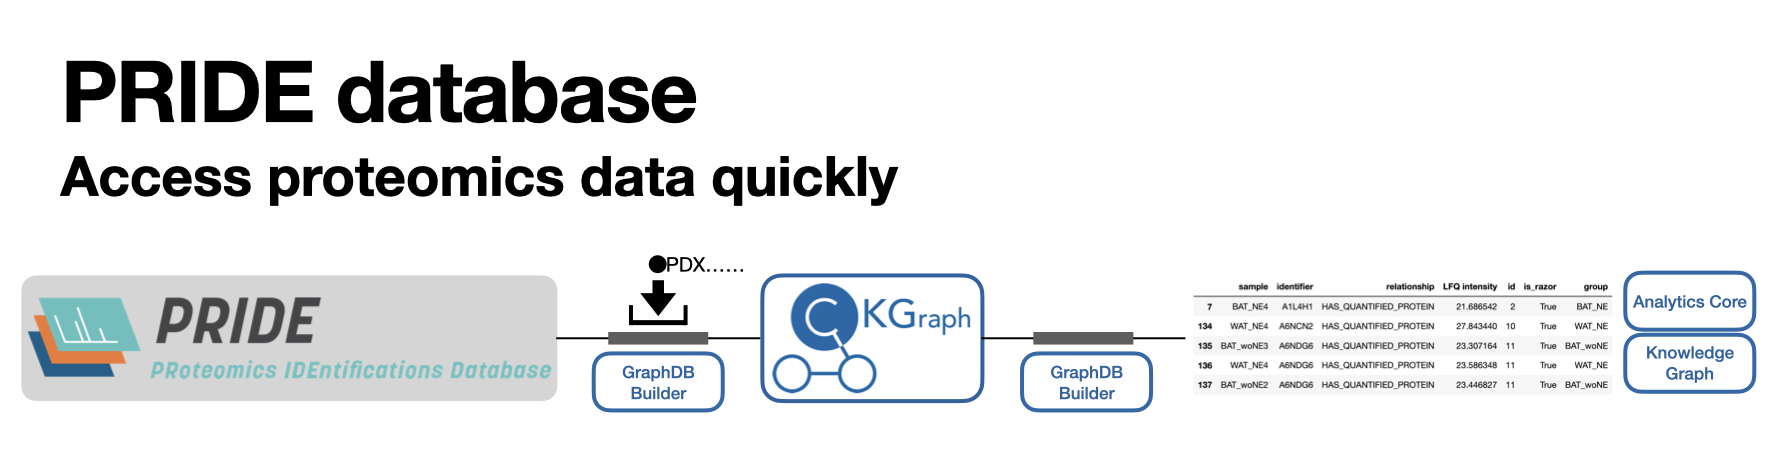


This notebook shows how **CKG** can be used to download data from the Proteomics Identifications Database - PRIDE - (https://www.ebi.ac.uk/pride/) and quickly formated to start analyzing them with the functionality in the analytics core.





In [2]:
import os

import ckg_utils
from graphdb_builder import builder_utils
from graphdb_builder.experiments.parsers import proteomicsParser

from analytics_core.analytics import analytics

/Users/albertosantos/miniconda3/envs/clean_env/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.7, the latest is 0.3.8.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/albertosantos/miniconda3/envs/clean_env/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:197: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '
/Users/albertosantos/miniconda3/envs/clean_env/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


##### CKG path

In [3]:
ckg_location = '/Users/albertosantos/Development/Clinical_Proteomics_Department/ClinicalKnowledgeGraph(CKG)/code'

#### Define where the data should be downloaded

In [ ]:
analysis_dir = os.path.join(ckg_location, '/data/tmp/Deshmukh2019')
ckg_utils.checkDirectory(analysis_dir)

##### Specify the PRIDE identifier and file to be downloaded 

In [ ]:
pxd_id = 'PXD008541'
file_name='SearchEngineResults_secretome.zip.rar'

##### Download data

We can use functionality in graphdb_builder to directly download data files from EBI's PRIDE database (https://www.ebi.ac.uk/pride/). For that you just need to specify the PRIDE identifier for the project (PXD...) and the name of the file to download. In this case, the project identifier is **PXD008541** and the file we will use is **SearchEngineResults_secretome.zip.rar**, a RAR compressed file with the output files from MaxQuant.

In [4]:
builder_utils.download_PRIDE_data(pxd_id=pxd_id, 
                                  file_name=file_name, 
                                  to=analysis_dir)

{'accession': 'PXD008541',
 'title': 'Human primary brown and white fat cell secretome',
 'projectDescription': 'Secreted proteins from adipose tissue play a role in metabolic cross-talk and homeostasis. We performed high sensitivity mass spectrometry-based proteomics on the cell media of human adipocytes derived from the supraclavicular brown adipose and from the subcutaneous white adipose depots of adult humans. We identified 471 potentially secreted proteins covering interesting protein categories such as hormones, growth factors, extracellular matrix proteins and proteins of the complement system, which were differentially regulated in brown and white adipocytes. A total of 101 proteins were exclusively quantified in brown adipocytes and among these were ependymin-related protein 1 (EPDR1). Functional studies suggested a role for EPDR1 in thermogenic adipogenesis. In conclusion, we report substantial differences between the secretomes of brown and white human adipocytes and identif

## Read Data In

### Decompress File

In [5]:
builder_utils.unrar(filepath=os.path.join(analysis_dir, file_name), to=analysis_dir)

The list of files within the compressed folder can be listed using the listDirectoryFiles functionality in gaphdb_builder.

In [6]:
builder_utils.listDirectoryFiles(analysis_dir)

['peptides.txt',
 'SearchEngineResults_secretome.zip.rar',
 'modificationSpecificPeptides.txt',
 'experimentalDesignTemplate.txt',
 'parameters.txt',
 'msms.txt',
 'proteinGroups.txt']

We use the proteinGroups file that contains the proteomics data processed using MaxQuant software.

In [7]:
proteinGroups_file = os.path.join(analysis_dir, 'proteinGroups.txt')

### Parse Contents

CKG has parsers for MaxQuant and Spectronaut output files. The default configuration needed to parse these files needs to be updated with the name of the columns containing the protein quantifications for each sample. Also, the default configuration can be adapted to the experiment by selected specific filters or removing non-used columns. For example, in this study the output file did not have columns: Score, Q-value, so we removed them from the configuration and the column 'Potential contaminant' was renamed to 'Contaminant' so we changed the name in the filters.

In [8]:
#d = pd.read_csv(proteinGroups_file, sep='\t')
#d.columns.tolist()

In [9]:
columns = ['LFQ intensity BAT_NE1',
           'LFQ intensity BAT_NE2',
           'LFQ intensity BAT_NE3',
           'LFQ intensity BAT_NE4',
           'LFQ intensity BAT_NE5',
           'LFQ intensity BAT_woNE1',
           'LFQ intensity BAT_woNE2',
           'LFQ intensity BAT_woNE3',
           'LFQ intensity BAT_woNE4',
           'LFQ intensity BAT_woNE5',
           'LFQ intensity WAT_NE1',
           'LFQ intensity WAT_NE2',
           'LFQ intensity WAT_NE3',
           'LFQ intensity WAT_NE4',
           'LFQ intensity WAT_NE5',
           'LFQ intensity WAT_woNE1',
           'LFQ intensity WAT_woNE2',
           'LFQ intensity WAT_woNE3',
           'LFQ intensity WAT_woNE4',
           'LFQ intensity WAT_woNE5', 
           'Contaminant']

In [10]:
configuration = proteomicsParser.update_configuration(data_type='proteins', 
                                                      processing_tool='maxquant', 
                                                      value_col='LFQ intensity', 
                                                      columns=columns, 
                                                      drop_cols=['Score', 'Q-value', 'Potential contaminant'],
                                                      filters=['Reverse', 'Only identified by site', 'Contaminant'])

In [11]:
configuration

{'columns': ['Majority protein IDs',
  'Razor + unique peptides',
  'id',
  'LFQ intensity \\w+_AS\\d+_?-?\\d*',
  'Intensity \\w+_AS\\d+_?-?\\d*',
  'Reverse',
  'Only identified by site',
  'is_razor',
  'LFQ intensity BAT_NE1',
  'LFQ intensity BAT_NE2',
  'LFQ intensity BAT_NE3',
  'LFQ intensity BAT_NE4',
  'LFQ intensity BAT_NE5',
  'LFQ intensity BAT_woNE1',
  'LFQ intensity BAT_woNE2',
  'LFQ intensity BAT_woNE3',
  'LFQ intensity BAT_woNE4',
  'LFQ intensity BAT_woNE5',
  'LFQ intensity WAT_NE1',
  'LFQ intensity WAT_NE2',
  'LFQ intensity WAT_NE3',
  'LFQ intensity WAT_NE4',
  'LFQ intensity WAT_NE5',
  'LFQ intensity WAT_woNE1',
  'LFQ intensity WAT_woNE2',
  'LFQ intensity WAT_woNE3',
  'LFQ intensity WAT_woNE4',
  'LFQ intensity WAT_woNE5',
  'Contaminant'],
 'generated_columns': ['is_razor'],
 'filters': ['Reverse', 'Only identified by site', 'Contaminant'],
 'proteinCol': 'Majority protein IDs',
 'contaminant_tag': 'CON__',
 'valueCol': 'LFQ intensity',
 'groupCol': 'id'

When we parse the data, we obtain a matrix in an edge list following CKG's graph format: sample, protein, realtionship_type, value, protein_group_id, is_razor

In [12]:
data = proteomicsParser.parser_from_file(proteinGroups_file, configuration=configuration, data_type='proteins', is_standard=False)[('proteins', 'w')]

/Users/albertosantos/Development/Clinical_Proteomics_Department/ClinicalKnowledgeGraph(CKG)/code/src/graphdb_builder/experiments/parsers/proteomicsParser.py:118: RuntimeWarning:

divide by zero encountered in log2



In [13]:
data.head()

START_ID  END_ID                    TYPE      value  id  is_razor
0  WAT_woNE5  A0AVL1  HAS_QUANTIFIED_PROTEIN  20.109423   0     False
1  WAT_woNE2  A1A441  HAS_QUANTIFIED_PROTEIN  23.658291   1     False
2  BAT_woNE3  A1A441  HAS_QUANTIFIED_PROTEIN  22.753054   1     False
3  WAT_woNE5  A1A441  HAS_QUANTIFIED_PROTEIN  23.363726   1     False
4    BAT_NE3  A1A441  HAS_QUANTIFIED_PROTEIN  23.317552   1     False

In [14]:
data.columns = ['sample', 'identifier', 'relationship', 'LFQ intensity', 'id', 'is_razor']

In [15]:
data.head()

sample identifier            relationship  LFQ intensity  id  is_razor
0  WAT_woNE5     A0AVL1  HAS_QUANTIFIED_PROTEIN      20.109423   0     False
1  WAT_woNE2     A1A441  HAS_QUANTIFIED_PROTEIN      23.658291   1     False
2  BAT_woNE3     A1A441  HAS_QUANTIFIED_PROTEIN      22.753054   1     False
3  WAT_woNE5     A1A441  HAS_QUANTIFIED_PROTEIN      23.363726   1     False
4    BAT_NE3     A1A441  HAS_QUANTIFIED_PROTEIN      23.317552   1     False

In [16]:
data.shape

(57470, 6)

In [17]:
data = data[data.is_razor]

In [18]:
data.shape

(17489, 6)

We can use the sample names to extract the group information: BAT_NE, WAT_NE, BAT_woNE, WAT_woNE

With this last column, we obtain the **original dataframe** used as starting point in CKG' analysis pipelines.

In [19]:
data['group'] = data['sample'].apply(lambda x: re.sub('\d', '', x))

In [20]:
data.head()

sample identifier            relationship  LFQ intensity  id  \
7      BAT_NE4     A1L4H1  HAS_QUANTIFIED_PROTEIN      21.686542   2   
134    WAT_NE4     A6NCN2  HAS_QUANTIFIED_PROTEIN      27.843440  10   
135  BAT_woNE3     A6NDG6  HAS_QUANTIFIED_PROTEIN      23.307164  11   
136    WAT_NE4     A6NDG6  HAS_QUANTIFIED_PROTEIN      23.586348  11   
137  BAT_woNE2     A6NDG6  HAS_QUANTIFIED_PROTEIN      23.446827  11   

     is_razor     group  
7        True    BAT_NE  
134      True    WAT_NE  
135      True  BAT_woNE  
136      True    WAT_NE  
137      True  BAT_woNE

In [21]:
original = data[['group', 'sample', 'identifier', 'LFQ intensity']]

##### --> the original dataframe is the starting point in CKG's  proteomics analysis.

## Data Preparation

In order to prepare the data we follow the steps:

1) Filtering based on missing values

2) Imputation of missing values using a mixed model estrategy: KNN and MinProb

These steps will generate the **processed dataframe**, a complete matrix that can be used in the exploratory and statistical analysis.

In [28]:
processed_data = analytics.get_proteomics_measurements_ready(original, 
                                                             index_cols=['group', 'sample'], 
                                                             drop_cols=['sample'], 
                                                             group='group', 
                                                             identifier='identifier', 
                                                             extra_identifier=None, 
                                                             imputation=True, 
                                                             method='mixed',
                                                             knn_cutoff=0.4,
                                                             missing_method='at_least_x', 
                                                             missing_per_group=True, 
                                                             min_valid=3, 
                                                             value_col='LFQ intensity',
                                                             shift=1.8,
                                                             nstd=0.3)

In [29]:
processed_data.head()

identifier   group   sample     A6NDG6     B3KW70     E9PAV3     E9PGF5  \
0           BAT_NE  BAT_NE1  22.948430  29.091339  26.578739  23.563604   
1           BAT_NE  BAT_NE2  22.954981  28.610591  27.468243  23.811590   
2           BAT_NE  BAT_NE3  22.817377  28.272086  26.773793  23.708936   
3           BAT_NE  BAT_NE4  22.937885  30.812377  26.089441  23.757766   
4           BAT_NE  BAT_NE5  23.047168  28.364277  26.971255  24.055731   

identifier     E9PHK0     F5GWP8     F8W031     G3V3G9  ...     Q9Y4Y9  \
0           27.322081  27.821164  24.420405  23.947173  ...  22.109509   
1           26.283462  27.452462  23.071491  23.891354  ...  22.109780   
2           25.299149  27.471115  22.773441  23.618293  ...  22.104088   
3           28.160532  28.601127  23.301110  23.881631  ...  22.109074   
4           25.989885  26.889135  22.317248  24.034814  ...  22.113593   

identifier     Q9Y5P4     Q9Y5X3     Q9Y5Z4     Q9Y600     Q9Y617     Q9Y646  \
0           23.130157  22.569201  28.647187  24.888146  26.012226  22.746304   
1           23.312665  22.572965  28.026016  24.164153  26.294796  22.171377   
2           23.378619  22.493896  27.956985  25.221587  26.440457  22.150598   
3           22.237510  22.563142  27.506049  24.793327  24.906694  22.693322   
4           23.397543  22.625936  28.196715  25.171234  26.397037  21.778724   

identifier     Q9Y678     Q9Y696     Q9Y6I3  
0           23.610317  24.676053  23.408469  
1           25.493292  24.928906  22.570449  
2           25.144410  26.972790  22.340063  
3           23.264133  25.210343  22.709766  
4           24.573057  26.251168  22.132167  

[5 rows x 1169 columns]